In [4]:
import os 
import yaml
import datetime

import numpy as np
import pandas as pd

In [7]:
ENV_FILE='../env.yaml'
with open(ENV_FILE) as f:
    params = yaml.load(f, Loader=yaml.FullLoader)

#Initialisation des chemins vers les fichiers
ROOT_DIR = os.path.dirname(os.path.abspath(ENV_FILE))
DATA_FILE= os.path.join(ROOT_DIR, params['directories']['processed'], params['files']['all_data'])

#Lecture du fihcier de données
epidemie_df = (pd.read_csv(DATA_FILE, parse_dates=['Last Update'])
               .assign(day=lambda _df:_df['Last Update'].dt.date)
               .drop_duplicates(subset=['Country/Region', 'Province/State', 'day'])
               [lambda df: df['day'] <= datetime.date(2020,3,12)]
              )

In [8]:
epidemie_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
0,Anhui,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,31.8257,117.2264,01-22-2020.csv,2020-01-22
1,Beijing,Mainland China,2020-01-22 17:00:00,14.0,NaN,NaN,40.1824,116.4142,01-22-2020.csv,2020-01-22
2,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,NaN,NaN,30.0572,107.8740,01-22-2020.csv,2020-01-22
3,Fujian,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,26.0789,117.9874,01-22-2020.csv,2020-01-22
4,Gansu,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,36.0611,103.8343,01-22-2020.csv,2020-01-22


In [11]:
france_df = (epidemie_df[epidemie_df['Country/Region'] == 'France']
              .groupby(['Country/Region', 'day'])
              .agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
              .reset_index()
             )
france_df.tail()

,Country/Region,day,Confirmed,Deaths,Recovered
23,France,2020-03-07,949.0,11.0,12.0
24,France,2020-03-08,1126.0,19.0,12.0
25,France,2020-03-09,1209.0,19.0,12.0
26,France,2020-03-10,1784.0,33.0,12.0
27,France,2020-03-11,2284.0,48.0,12.0


In [15]:
france_df['Confirmed'].diff()
# Fait la différence entre la ligne n et la ligne n-1

0       NaN
1       1.0
2       0.0
3       0.0
4       1.0
5       1.0
6       0.0
7       0.0
8       1.0
9       5.0
10      0.0
11      1.0
12      2.0
13      4.0
14     20.0
15     19.0
16     43.0
17     30.0
18     61.0
19     13.0
20     81.0
21     92.0
22    276.0
23    296.0
24    177.0
25     83.0
26    575.0
27    500.0
Name: Confirmed, dtype: float64

In [16]:
korea_df = (epidemie_df[epidemie_df['Country/Region'] == 'South Korea']
            .groupby(['Country/Region', 'day'])
            .agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
            .reset_index()
             )
korea_df.tail()

,Country/Region,day,Confirmed,Deaths,Recovered
38,South Korea,2020-03-05,6088.0,35.0,41.0
39,South Korea,2020-03-06,6593.0,42.0,135.0
40,South Korea,2020-03-07,7041.0,44.0,135.0
41,South Korea,2020-03-08,7314.0,50.0,118.0
42,South Korea,2020-03-09,7478.0,53.0,118.0


<function matplotlib.pyplot.show(*args, **kw)>

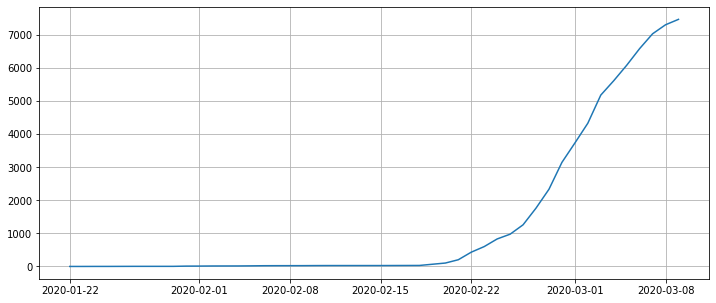

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 5))
plt.plot(korea_df['day'], korea_df['Confirmed'])
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

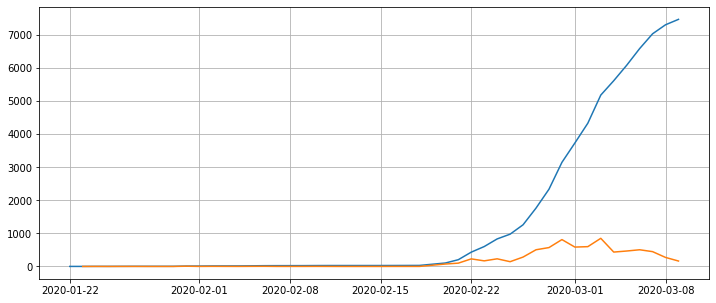

In [20]:
korea_df['infected'] = korea_df['Confirmed'].diff()

fig = plt.figure(figsize=(12, 5))
plt.plot(korea_df['day'], korea_df['Confirmed'])
plt.plot(korea_df['day'], korea_df['infected'])
plt.grid(True)
plt.show

In [21]:
def get_country(self, country):
    return (epidemie_df[epidemie_df['Country/Region'] == country]
           .groupby(['Country/Region', 'day'])
           .agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
           .reset_index()
           )

# Monkey patch pd.DataFrame
pd.DataFrame.get_country = get_country

In [24]:
get_country(epidemie_df, 'South Korea').head()

,Country/Region,day,Confirmed,Deaths,Recovered
0,South Korea,2020-01-22,1.0,0.0,0.0
1,South Korea,2020-01-23,1.0,0.0,0.0
2,South Korea,2020-01-24,2.0,0.0,0.0
3,South Korea,2020-01-25,2.0,0.0,0.0
4,South Korea,2020-01-26,3.0,0.0,0.0


In [25]:
italy_df = epidemie_df.get_country('Italy')
italy_df.head()

,Country/Region,day,Confirmed,Deaths,Recovered
0,Italy,2020-01-31,2.0,0.0,0.0
1,Italy,2020-02-07,3.0,0.0,0.0
2,Italy,2020-02-21,20.0,1.0,0.0
3,Italy,2020-02-22,62.0,2.0,1.0
4,Italy,2020-02-23,155.0,3.0,2.0


<function matplotlib.pyplot.show(*args, **kw)>

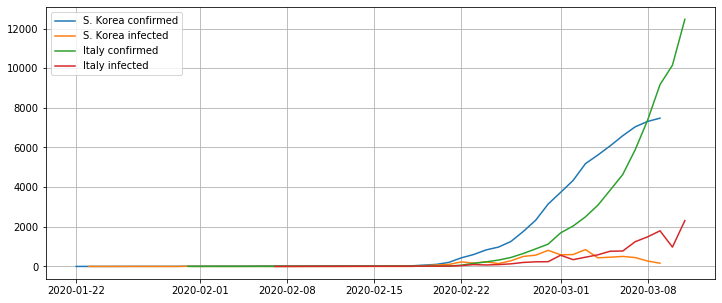

In [30]:
italy_df['infected'] = italy_df['Confirmed'].diff()

fig = plt.figure(figsize=(12, 5))
plt.plot(korea_df['day'], korea_df['Confirmed'], label='S. Korea confirmed')
plt.plot(korea_df['day'], korea_df['infected'], label='S. Korea infected')
plt.plot(italy_df['day'], italy_df['Confirmed'], label='Italy confirmed')
plt.plot(italy_df['day'], italy_df['infected'], label='Italy infected')
plt.grid(True)
plt.legend()
plt.show

In [32]:
beta,gamma = [0.01,0.1]

def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

In [33]:
korea_df.head()

,Country/Region,day,Confirmed,Deaths,Recovered,infected
0,South Korea,2020-01-22,1.0,0.0,0.0,NaN
1,South Korea,2020-01-23,1.0,0.0,0.0,0.0
2,South Korea,2020-01-24,2.0,0.0,0.0,1.0
3,South Korea,2020-01-25,2.0,0.0,0.0,0.0
4,South Korea,2020-01-26,3.0,0.0,0.0,1.0


In [ ]:
from scipy.integrate import solve_ivp

In [41]:
beta,gamma = [0.01,0.1]
solution_korea = solve_ivp(SIR, [0, 40], [51_470_000, 1, 0], t_eval=np.arange(0, 40, 1))

In [43]:
solution_korea

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 10617824
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])
 t_events: None
        y: array([[ 5.14700000e+07,  2.04872617e-07, -5.79192642e-07,
        -1.02864803e-07,  3.39434814e-07,  1.95092383e-07,
         1.56908982e-06, -5.54756490e-07,  8.55639764e-07,
        -3.84005541e-07,  1.14854677e-06,  1.04737837e-06,
         1.41446345e-07, -3.89979213e-08, -1.31579840e-06,
        -1.17991062e-06, -5.32379870e-07,  6.79204480e-07,
        -7.21960552e-07, -4.83684927e-07, -5.40636688e-07,
         5.00739636e-09, -2.42491836e-07, -4.15623310e-07,
         5.38168115e-07, -1.20506229e-08,  4.33030631e-07,
        -5.17489767e-07,  6.52063146e-07, -1.73762585e-07,
         6.151133

In [44]:
def plot_epidemie(solution, infected):
    fig = plt.figure(figsize=(12, 5))
    plt.plot(solution.t, solution.y[0])
    plt.plot(solution.t, solution.y[1])
    plt.plot(solution.t, solution.y[2])
    plt.plot(infected.reset_index(drop=True).index, infected, "k*:")
    plt.grid(True)
    plt.legend(['Susceptible', 'Infected', 'Recovered', 'Original data'])
    plt.show

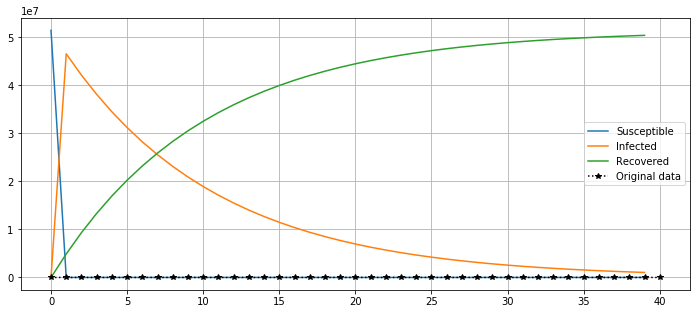

In [45]:
plot_epidemie(solution_korea, korea_df.loc[2:]['infected'])

In [46]:
korea_df['infected'].max()

851.0

In [47]:
korea_df['infected'].diff().max()

252.0

In [50]:
(korea_df['Recovered'].diff().loc[korea_df['infected'] !=0] / korea_df.loc[korea_df['infected'] !=0]['infected']).mean()

0.17870945831971552

In [51]:
beta, gamma = [0.00000001, 0.1]
solution_korea = solve_ivp(SIR, [0, 40], [51_470_000, 1, 0], t_eval=np.arange(0, 41, 1))

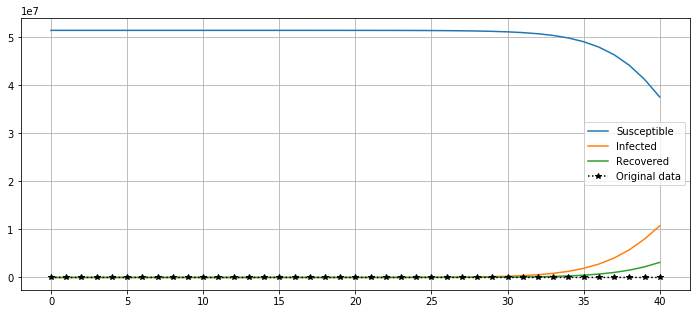

In [53]:
plot_epidemie(solution_korea, korea_df.iloc[2:]['infected'])

In [66]:
def sumsq_error(parameters):
    beta, gamma = parameters
    
    def SIR(t,y):
        S = y[0]
        I = y[1]
        R = y[2]
        return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

    solution = solve_ivp(SIR, [0, nb_steps-1], [total_population, 1, 0], t_eval=np.arange(0, nb_steps, 1))
    
    return(sum((solution.y[1]-infected_population)**2))

In [67]:
total_population = 51_470_000
infected_population = korea_df.loc[2:]['infected']
nb_steps = len(infected_population)

In [68]:
%%time
from scipy.optimize import minimize

msol = minimize(sumsq_error,[0.001, 0.1], method='Nelder-Mead')
msol.x

Wall time: 11min 12s


array([ 0.06321101, 33.06340503])

In [69]:
beta_optimal = 0.06321101
gamma_optimal = 33.06340503

In [71]:
beta = beta_optimal
gamma = gamma_optimal
"""
def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])
"""
solution_korea_optimal = solve_ivp

In [72]:
#plot_epidemie(solution_korea_optimal, korea_df.loc[2:])

In [73]:
#fig = plt.figure(figsize=(12, 5))
#plt.plot(solution_korea_optimal.t, solution_korea_optimal.y[1], korea_df.loc[])
#plt.grid(True)
#plt.legend()
#plt.show

In [74]:
#china_df = epidemie_df.get_country('Mainland China').loc[:40]
#china_df.head()